### Import your librares

In [15]:
import pandas as pd
import seaborn as sns
import numpy as np

### Load your dataset

In [2]:
df=pd.read_csv('seattle_weather.csv')

In [6]:
df.head(50)

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True
5,1948-01-06,0.44,48,39,True
6,1948-01-07,0.41,50,40,True
7,1948-01-08,0.04,48,35,True
8,1948-01-09,0.12,50,31,True
9,1948-01-10,0.74,43,34,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    25551 non-null  object 
 1   PRCP    25548 non-null  float64
 2   TMAX    25551 non-null  int64  
 3   TMIN    25551 non-null  int64  
 4   RAIN    25548 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 998.2+ KB


In [5]:
df.isnull().sum()

DATE    0
PRCP    3
TMAX    0
TMIN    0
RAIN    3
dtype: int64

### Handle missing data in PRCP and RAIN columns

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

DATE    0
PRCP    0
TMAX    0
TMIN    0
RAIN    0
dtype: int64

### Repeat the following steps for each column within outliers

* Visualize the outliers
* Detect if your data set contains any outliers
* Identify lower & higher limit of outliers
* Drop all outliers
* Visualize the column after processing


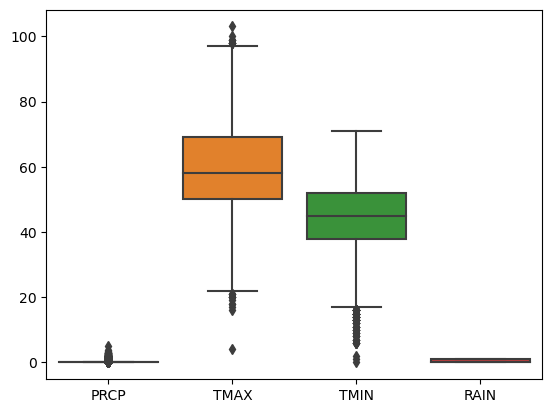

In [13]:
sns.boxplot(data=df); # it contains outliers in PRCP,TMAX,TMIN

In [17]:
Q1 = np.percentile(df['PRCP'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df['PRCP'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
               
print('lower bound outliers ', Q1 - 1.5*(IQR))
print('higher bound outliers', Q3 + 1.5*(IQR))

lower bound outliers  -0.15000000000000002
higher bound outliers 0.25


In [18]:
Q1 = np.percentile(df['TMAX'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df['TMAX'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
               
print('lower bound outliers ', Q1 - 1.5*(IQR))
print('higher bound outliers', Q3 + 1.5*(IQR))

lower bound outliers  21.5
higher bound outliers 97.5


In [19]:
Q1 = np.percentile(df['TMIN'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df['TMIN'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
               
print('lower bound outliers ', Q1 - 1.5*(IQR))
print('higher bound outliers', Q3 + 1.5*(IQR))

lower bound outliers  17.0
higher bound outliers 73.0


In [29]:
 df.drop(df[(df['PRCP'] > 0.25) | (df['PRCP'] < -0.150)].index,inplace=True)

In [28]:
df.drop(df[(df['TMAX'] > 97.5) | (df['TMAX'] < 21.5)].index,inplace=True)

In [26]:
df.drop(df[(df['TMIN'] > 73.0) | (df['TMIN'] < 17.0)].index,inplace=True)

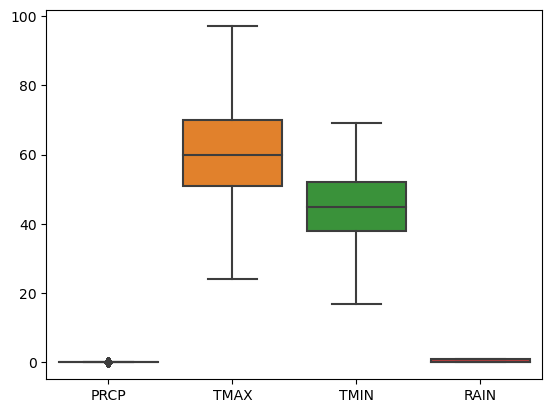

In [30]:
sns.boxplot(data=df);